In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [55]:
pdf = pd.read_csv('poloniex_usdt_pairs.csv')
new_df = pd.DataFrame(pdf[1:])
new_df = new_df.set_index('Unnamed: 0').apply(lambda x: pd.Series([float(i) for i in x]))
new_df.head()

/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,USDT_BTC,USDT_BTC.1,USDT_BTC.2,USDT_XRP,USDT_XRP.1,USDT_XRP.2,USDT_BCH,USDT_BCH.1,USDT_BCH.2,USDT_ETH,...,USDT_ZEC.2,USDT_DASH,USDT_DASH.1,USDT_DASH.2,USDT_NXT,USDT_NXT.1,USDT_NXT.2,USDT_REP,USDT_REP.1,USDT_REP.2
0,5.596723,5398.837117,964.642624,1569.505205,10.177061,0.006484,NaN,NaN,NaN,10.829825,...,48.030064,0.311778,3.531872,11.328167,0.000000,0.00000,0.005898,4.451525,16.991181,3.816935
1,0.087282,84.302118,965.858035,0.000000,0.000000,0.006487,NaN,NaN,NaN,1.905818,...,47.995989,0.000000,0.000000,11.340000,3.749288,0.02215,0.005908,0.627492,2.407884,3.837313
2,2.737368,2638.676171,963.946565,0.000000,0.000000,0.006487,NaN,NaN,NaN,52.238724,...,47.870846,0.000000,0.000000,11.340000,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313
3,3.550087,3415.272309,962.024978,0.000000,0.000000,0.006487,NaN,NaN,NaN,71.031741,...,47.870846,0.021098,0.238512,11.305037,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313
4,0.083323,80.287691,963.568648,0.000000,0.000000,0.006487,NaN,NaN,NaN,2.364352,...,48.130523,0.000000,0.000000,11.305037,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313


In [56]:
df1=new_df.drop({'USDT_BCH','USDT_BCH.1','USDT_BCH.2'},axis=1)
df1.head()

,USDT_BTC,USDT_BTC.1,USDT_BTC.2,USDT_XRP,USDT_XRP.1,USDT_XRP.2,USDT_ETH,USDT_ETH.1,USDT_ETH.2,USDT_LTC,...,USDT_ZEC.2,USDT_DASH,USDT_DASH.1,USDT_DASH.2,USDT_NXT,USDT_NXT.1,USDT_NXT.2,USDT_REP,USDT_REP.1,USDT_REP.2
0,5.596723,5398.837117,964.642624,1569.505205,10.177061,0.006484,10.829825,87.204495,8.052253,0.000000,...,48.030064,0.311778,3.531872,11.328167,0.000000,0.00000,0.005898,4.451525,16.991181,3.816935
1,0.087282,84.302118,965.858035,0.000000,0.000000,0.006487,1.905818,15.430150,8.096340,3.488528,...,47.995989,0.000000,0.000000,11.340000,3.749288,0.02215,0.005908,0.627492,2.407884,3.837313
2,2.737368,2638.676171,963.946565,0.000000,0.000000,0.006487,52.238724,424.651523,8.129056,0.022954,...,47.870846,0.000000,0.000000,11.340000,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313
3,3.550087,3415.272309,962.024978,0.000000,0.000000,0.006487,71.031741,581.842210,8.191299,0.001006,...,47.870846,0.021098,0.238512,11.305037,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313
4,0.083323,80.287691,963.568648,0.000000,0.000000,0.006487,2.364352,19.389736,8.200868,15.142531,...,48.130523,0.000000,0.000000,11.305037,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313


In [57]:
df1=df1[:-3]
df1.isnull().sum()

USDT_BTC       0
USDT_BTC.1     0
USDT_BTC.2     0
USDT_XRP       0
USDT_XRP.1     0
USDT_XRP.2     0
USDT_ETH       0
USDT_ETH.1     0
USDT_ETH.2     0
USDT_LTC       0
USDT_LTC.1     0
USDT_LTC.2     0
USDT_ETC       0
USDT_ETC.1     0
USDT_ETC.2     0
USDT_STR       0
USDT_STR.1     0
USDT_STR.2     0
USDT_XMR       0
USDT_XMR.1     0
USDT_XMR.2     0
USDT_ZEC       0
USDT_ZEC.1     0
USDT_ZEC.2     0
USDT_DASH      0
USDT_DASH.1    0
USDT_DASH.2    0
USDT_NXT       0
USDT_NXT.1     0
USDT_NXT.2     0
USDT_REP       0
USDT_REP.1     0
USDT_REP.2     0
dtype: int64

In [58]:
x=df1.iloc[:,2:3]
x.head()

,USDT_BTC.2
0,964.642624
1,965.858035
2,963.946565
3,962.024978
4,963.568648


In [59]:
y=df1.iloc[1:,2:3]
#y.head()
y = y.apply(lambda x: pd.Series([float(i) for i in x]))
y.head()

,USDT_BTC.2
0,965.858035
1,963.946565
2,962.024978
3,963.568648
4,965.356982


In [60]:
x.shape

(125388, 1)

In [61]:
scaler_x=MinMaxScaler(feature_range=(-1,1))
#x_set=np.array(x).reshape((len(x),1))
x_set=scaler_x.fit_transform(x)
scaler_y=MinMaxScaler(feature_range=(-1,1))
#y=np.array(y).reshape((len(y),1))
y=scaler_y.fit_transform(y)


In [62]:
x.shape

(125388, 1)

In [63]:
data_to_use=10000
train_end=int(data_to_use*0.8)
total_data=len(df1)
#start=total_data-data_to_use

x_train=np.array(x[0:train_end])
y_train=np.array(y[0:train_end])
x_test=np.array(x[train_end+1:data_to_use+1])
y_test=np.array(y[train_end+1:data_to_use+1])

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


In [64]:
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [65]:
fit1 = Sequential ()
fit1.add (LSTM (  128, activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(1,1) ))
fit1.add(Dropout(0.2))
fit1.add (Dense (output_dim =1, activation = 'linear'))
 
fit1.compile (loss ="mean_squared_error" , optimizer = "adam")   
fit1.fit (x_train, y_train, batch_size =80, nb_epoch =10, shuffle = False)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  after removing the cwd from sys.path.
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
8000/8000 [==============================] - 2s 197us/step - loss: 0.3025
Epoch 2/10
8000/8000 [==============================] - 1s 147us/step - loss: 0.0025
Epoch 3/10
8000/8000 [==============================] - 1s 145us/step - loss: 0.0023
Epoch 4/10
8000/8000 [==============================] - 1s 141us/step - loss: 0.0023
Epoch 5/10
8000/8000 [==============================] - 1s 170us/step - loss: 0.0022
Epoch 6/10
8000/8000 [==============================] - 1s 142us/step - loss: 0.0022
Epoch 7/10
8000/8000 [==============================] - 1s 149us/step - loss: 0.0022
Epoch 8/10
8000/8000 [==============================] - 1s 140us/step - loss: 0.0021
Epoch 9/10
8000/8000 [==============================] - 1s 141us/step - loss: 0.0021
Epoch 10/10
8000/8000 [==============================] - 1s 133us/step - loss: 0.0021


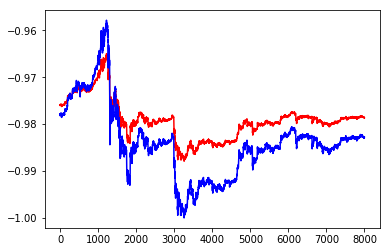

In [66]:
trainpredict=fit1.predict(x_train)
testpredict=fit1.predict(x_test)
plt.plot(trainpredict, color='red')
plt.plot(y_train,color='blue')

In [67]:
trainpredict.shape


(8000, 1)

In [68]:
#testpredict=testpredict.reshape(len(testpredict),1)
#y_test=y_test.reshape(len(y_test),1)
#y_train=y_train.reshape(len(y_train),1)

trainpredict=scaler_y.inverse_transform(np.array(trainpredict))
testpredict=scaler_y.inverse_transform(np.array(testpredict))

y_test=scaler_y.inverse_transform(np.array(y_test))
y_train=scaler_y.inverse_transform(np.array(y_train))




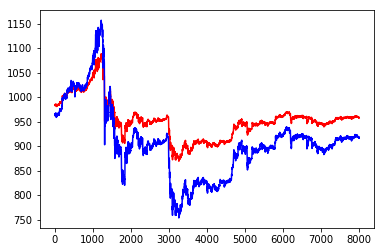

In [70]:
plt.plot(trainpredict, color='red')

#plt.plot(yy_train, color='red')
plt.plot(y_train,color='blue')

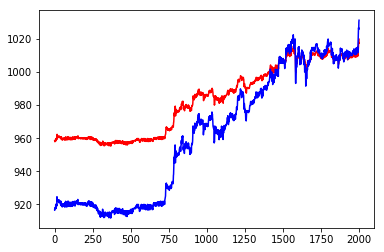

In [71]:
plt.plot(testpredict, color='red')

#plt.plot(yy_train, color='red')
plt.plot(y_test,color='blue')